---
layout: post
title: "CNN에 관하여"
author: "Chanjun Kim"
categories: Data분석
tags: [DeepLearning, DL, CNN, 이미지, 영상]
image: 03_entropy_gini.png
---

## **학습목적**
이미지 데이터를 처리하고 학습하는 딥러닝 모델 중 CNN을 공부하고 오픈 이미지 데이터를 가지고 한 스텝 한 스텝 따라가본다.<br>

## **CNN이란?**
Convolutional Neural Network의 약자로 주로 이미지나 영상 데이터를 처리하기 위한 딥러닝 알고리즘 중 하나이다. <br>
Flatten한 데이터를 처리하는 Fully Connected Neural Network와 다르게 이미지의 공간 정보 데이터를 유지하여 이미지를 인식할 수 있도록 만든다.<br>
이를 위해서 Filter, Pooling, Padding, Stride 등의 개념들이 사용되며, 천천히 알아가보도록 하겠습니다.

> 출처/참고자료 : http://taewan.kim/post/cnn/

간단한 이미지를 참고해서 가져오겠습니다. 출처는 [http://taewan.kim/post/cnn/](http://taewan.kim/post/cnn/) 입니다.<br>
사람은 간단하게 2라고 보이는 것을 알 수 있지만, 컴퓨터 혹은 딥러닝으로 학습시키기에는 이렇게만 정보가 있어서는 안됩니다.<br>
<img src = "https://blog.kakaocdn.net/dn/cJXmju/btqvGBJVMH0/WdMzvcKhEiMvaIAZuoYQfk/img.png" alt = "Oops" width = "300"/>
<br>

그래서 위와 같이 숫자로 이루어진 바둑판 모양으로 변환을 하게됩니다.<br>
<img src = "https://blog.kakaocdn.net/dn/bBoEcG/btqvGDucYov/thqHXwKvveVJmsbXJkHns0/img.png" alt = "Oops" width = "300"/>
<br>

그리고 각 위치별 특성을 보기 위하여 filter라는 어떠한 판을 만들어 그것을 곱하여 특성으로 사용되게 됩니다.<br>
<img src = "https://blog.kakaocdn.net/dn/Qa6UF/btqvFXmb9XY/nAMjiM4QwUgZ1K7egHWvsk/img.png" alt = "Oops" width = "600"/>

참고 그림이 잠깐 달라지지만, 결국 아래와 같은 Feature map을 만들 수 있습니다.<br>
여기서는 [[1, 0, 1], [0, 1, 0], [1, 0, 1]] 이렇게 생긴 filter를 사용했네요.<br>
<img src = "http://deeplearning.stanford.edu/wiki/images/6/6c/Convolution_schematic.gif" alt = "Oops" width = "600"/>
<br>

Filter에 대한 값은 [Keras layer initializers](https://keras.io/api/layers/initializers/)에서 확인하실 수 있습니다.<br>
다양하게 초기화시킬 수 있지만, 이 파라미터를 크게 바꾸는 경우나 바꿔서 크게 성능이 좋아지는 경우는 아직 확인하지 못했습니다.<br>
<br>

이러한 Convolution과 filter의 개념을 사용하여 아래와 같은 그림으로 CNN이 이루어지게 됩니다.<br>
<img src = "https://blog.kakaocdn.net/dn/NWDaW/btqvHgZ2d0Z/sEV8R4ANc3HltM2eKvmhvk/img.jpg" alt = "Oops" width = "800"/>

> 출처/참고자료 : http://taewan.kim/post/cnn/<br>
> 출처/참고자료 : https://youngq.tistory.com/40

그럼 이제 위에서 나오는 channel, Pooling, padding, Stride 등의 용어에 대해서 정리해보겠습니다.

- Channel
    - 채널은 이미지의 차원?이라고 생각하시면 될 것 같습니다. 흑백(Grey scale) 이미지에서는 1개의 채널을 갖지만 보통 우리가 많이 보는 색상이 있는 이미지라면 RGB라는 총 3개의 채널을 갖게 됩니다. ~~(투명도(alpha) 채널이 추가되는 경우도 있다고 합니다.)~~
    - 처음 이미지 채널을 시작으로 Convolution Layer의 채널 수를 늘려가면서 Hidden 층을 깊게 만들어 계산하게 됩니다.
    - Pooling 과정을 거치며 이미지 사이즈는 줄어들지만, Channel 수가 늘어나면서 연산량이 늘어나게 됩니다.
- Filter
    - Filter는 위에서 말씀드렸듯이 어떠한 Channel에 곱해지는 하나의 랜덤한 판입니다. 연산을 하는 과정에서 Back propagation(역전파)를 통하여 이 filter의 값을 업데이트하면서 최적해를 찾아가게 됩니다.
- Pooling
    - Pooling은 계속 연산량만 늘어나는 것을 방지하기 위해서 feature map 상에서 원하는 정보를 추출할 수 있도록 해주는 장치입니다.
    - 보통 feature map 상에서 가장 두들어진 부분을 뽑아내기 위하여 max pooling이라는 기법을 활용하고, 상황에 따라 전체적인 부분을 보기 위해서 average pooling과 같은 기법도 사용한다고 합니다. ~~보통 max pooling을 사용합니다.~~
    
---

### **이 외에도 loss function, Optimizer, Activate function 등 아직 배워야할 것이 많기 때문에 슬 코드로 시작해보도록 하겠습니다.**

In [1]:
import os
import sys
import warnings
from glob import glob
from tqdm import tqdm

import numpy as np
import pandas as pd

import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt

import cv2

In [2]:
warnings.filterwarnings("ignore")

In [3]:
!python --version

Python 3.8.10


In [4]:
tf.__version__

'2.5.0'

In [5]:
cv2.__version__

'4.5.1'

In [6]:
%matplotlib inline

오픈 데이터셋을 제공해주는 AI HUB에서 한국 음식 데이터를 받아서 실습을 해보겠습니다. [https://aihub.or.kr/aidata/13594](https://aihub.or.kr/aidata/13594) <br>
많은 종류가 있지만 제 취향 상 구이 카테고리를 분류해보도록 하겠습니다.

In [7]:
file_list = pd.DataFrame(glob("data/kfood/구이/*/*"), columns = ["dir_name"])
file_list

,dir_name
0,data/kfood/구이\갈비구이\crop_area.properties
1,data/kfood/구이\갈비구이\Img_000_0000.jpg
2,data/kfood/구이\갈비구이\Img_000_0001.jpg
3,data/kfood/구이\갈비구이\Img_000_0002.jpg
4,data/kfood/구이\갈비구이\Img_000_0003.jpg
...,...
14024,data/kfood/구이\훈제오리\Img_013_0997.jpg
14025,data/kfood/구이\훈제오리\Img_013_0998.jpg
14026,data/kfood/구이\훈제오리\Img_013_0999.jpg
14027,data/kfood/구이\훈제오리\Img_013_1000.jpg


In [8]:
file_list.dir_name = file_list.dir_name.str.replace(pat = "\\", repl = "/")
file_list["category"] = file_list.dir_name.str.replace(pat = ".*/.*/.*/(.*)/(.*)(\.*)", repl = "\\1", regex = True)
file_list["file_name"] = file_list.dir_name.str.replace(pat = ".*/.*/.*/(.*)/(.*)(\.*)", repl = "\\2", regex = True)
file_list["ext_name"] = file_list.dir_name.str.replace(pat = ".*/.*/.*/(.*)/(.*)\.(.*)", repl = "\\3", regex = True)
file_list = file_list[file_list.ext_name.isin(["JPG", "jpg"])]
file_list

,dir_name,category,file_name,ext_name
1,data/kfood/구이/갈비구이/Img_000_0000.jpg,갈비구이,Img_000_0000.jpg,jpg
2,data/kfood/구이/갈비구이/Img_000_0001.jpg,갈비구이,Img_000_0001.jpg,jpg
3,data/kfood/구이/갈비구이/Img_000_0002.jpg,갈비구이,Img_000_0002.jpg,jpg
4,data/kfood/구이/갈비구이/Img_000_0003.jpg,갈비구이,Img_000_0003.jpg,jpg
5,data/kfood/구이/갈비구이/Img_000_0004.jpg,갈비구이,Img_000_0004.jpg,jpg
...,...,...,...,...
14023,data/kfood/구이/훈제오리/Img_013_0996.jpg,훈제오리,Img_013_0996.jpg,jpg
14024,data/kfood/구이/훈제오리/Img_013_0997.jpg,훈제오리,Img_013_0997.jpg,jpg
14025,data/kfood/구이/훈제오리/Img_013_0998.jpg,훈제오리,Img_013_0998.jpg,jpg
14026,data/kfood/구이/훈제오리/Img_013_0999.jpg,훈제오리,Img_013_0999.jpg,jpg


파일들은 거의 1000개씩 고루고루 있으므로 이번에도 제 취향대로 [삼겹살, 갈비구이, 곱창구이, 장어구이, 불고기, 조개구이] 정도를 선택하도록 하겠습니다.

In [9]:
file_list.reset_index(drop = True, inplace = True)
file_list.groupby("category").file_name.count()

category
갈비구이      998
갈치구이      998
고등어구이    1000
곱창구이     1000
닭갈비       996
더덕구이     1000
떡갈비       997
불고기       997
삼겹살       992
장어구이      997
조개구이     1000
조기구이     1000
황태구이      997
훈제오리      992
Name: file_name, dtype: int64

In [10]:
file_list = file_list[file_list.category.isin(["삼겹살", "갈비구이", "곱창구이", "장어구이", "불고기", "조개구이"])]
print(len(file_list))
print(file_list.category.unique())

5984
['갈비구이' '곱창구이' '불고기' '삼겹살' '장어구이' '조개구이']


> 한글 경로가 있을 때 opencv가 이미지를 읽지 못하는 현상 발생 : https://zzdd1558.tistory.com/228
> https://stackoverflow.com/questions/46236180/opencv-imshow-will-cause-jupyter-notebook-crash

In [11]:
def cv2_filereader(filePath) : 
    stream = open(filePath.encode("utf-8"), "rb") 
    bytes = bytearray(stream.read())
    numpyArray = np.asarray(bytes, dtype=np.uint8) 
    return cv2.imdecode(numpyArray , cv2.IMREAD_COLOR)

In [12]:
img = cv2_filereader(file_list.dir_name[0])

In [13]:
img.shape

(600, 900, 3)

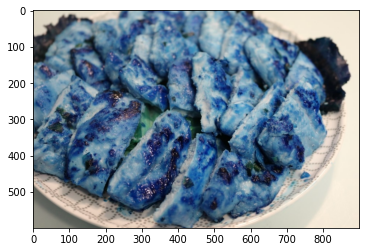

In [14]:
plt.imshow(img)
plt.show()

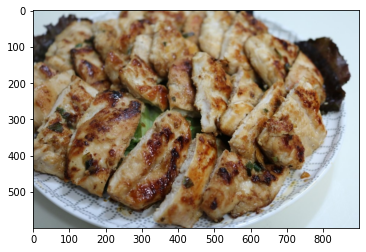

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [16]:
def show_image(dirs) :
    img = cv2_filereader(dirs)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

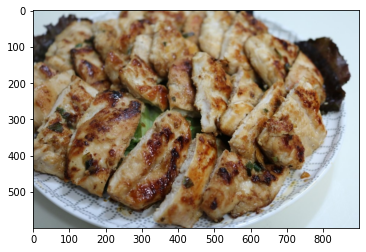

In [17]:
show_image(file_list.dir_name[0])

In [18]:
cv2_filereader("data/kfood/구이/갈비구이/Img_000_0145.jpg").shape[0]

AttributeError: 'NoneType' object has no attribute 'shape'

각각의 이미지 크기를 확인해보도록 한다.

In [19]:
def file_valid_chk(x) :
    try :
        cv2_filereader(x).shape[0]
        return 1
    except :
        return 0

In [20]:
file_list["valid"] = [file_valid_chk(x) for x in tqdm(file_list.dir_name)]
file_list.valid.value_counts()

100%|█████████████████████████████████████████████████████████████████████████████| 5984/5984 [00:27<00:00, 221.36it/s]


1    5972
0      12
Name: valid, dtype: int64

In [21]:
file_list = file_list[file_list.valid == 1]
file_list["shapes"] = [cv2_filereader(x).shape[:2] for x in tqdm(file_list.dir_name)]
file_list["dimensions"] = [cv2_filereader(x).shape[2] for x in tqdm(file_list.dir_name)]
file_list

100%|█████████████████████████████████████████████████████████████████████████████| 5972/5972 [00:28<00:00, 208.94it/s]


,dir_name,category,file_name,ext_name,valid,shapes,dimensions
0,data/kfood/구이/갈비구이/Img_000_0000.jpg,갈비구이,Img_000_0000.jpg,jpg,1,"(600, 900)",3
1,data/kfood/구이/갈비구이/Img_000_0001.jpg,갈비구이,Img_000_0001.jpg,jpg,1,"(480, 640)",3
2,data/kfood/구이/갈비구이/Img_000_0002.jpg,갈비구이,Img_000_0002.jpg,jpg,1,"(600, 900)",3
3,data/kfood/구이/갈비구이/Img_000_0003.jpg,갈비구이,Img_000_0003.jpg,jpg,1,"(336, 600)",3
4,data/kfood/구이/갈비구이/Img_000_0004.jpg,갈비구이,Img_000_0004.jpg,jpg,1,"(705, 470)",3
...,...,...,...,...,...,...,...
10970,data/kfood/구이/조개구이/Img_010_0995.jpg,조개구이,Img_010_0995.jpg,jpg,1,"(400, 394)",3
10971,data/kfood/구이/조개구이/Img_010_0996.jpg,조개구이,Img_010_0996.jpg,jpg,1,"(400, 711)",3
10972,data/kfood/구이/조개구이/Img_010_0997.jpg,조개구이,Img_010_0997.jpg,jpg,1,"(400, 525)",3
10973,data/kfood/구이/조개구이/Img_010_0998.jpg,조개구이,Img_010_0998.jpg,jpg,1,"(400, 601)",3


In [22]:
file_list.dimensions.value_counts()

3    5972
Name: dimensions, dtype: int64

In [23]:
file_list.shapes.nunique()

936

In [24]:
file_list.category.nunique()

6

In [25]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Input, Activation

In [26]:
Input(shape = (124, 124, 3))

<KerasTensor: shape=(None, 124, 124, 3) dtype=float32 (created by layer 'input_1')>

In [27]:
model = EfficientNetB0(include_top=True, weights=None, input_tensor = Input(shape = (124, 124, 3)), pooling = "max", classes = 6)

In [28]:
from tensorflow.keras.utils import plot_model

In [30]:
plot_model(model, to_file=None)

TypeError: expected str, bytes or os.PathLike object, not NoneType

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy')

---

참고 자료 :
- https://youngq.tistory.com/40